In [ ]:
# model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=4)
# model.fit(X, y)
# TreeExplainer(model).shap_values(x)


In [1]:
import sklearn
import shap
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Compare data with UCI

Check if normalisation messes things up

Apply example dataset to logistic regression


# Apply test code to loan data

In [2]:
#Import dataset
df_loan = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\loan.csv', index_col=0)
df_loan.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,16,11.135007,1,13,0,176346.62670,...,0.102055,2.498291,0.793724,0,0,49,31,311301,6619,0
1,3609,11940,12191.99692,59,4,12.237563,2,17,2,39833.92100,...,0.036181,2.377215,0.974821,0,0,109,53,182610,20885,0
2,28276,9311,21603.22455,59,11,12.545884,5,18,0,91506.69105,...,18.778660,4.316277,1.020075,0,0,66,34,89801,26155,0
3,11170,6954,17877.15585,59,15,16.731201,2,12,0,108286.57590,...,0.044131,0.107020,0.749971,0,0,39,40,9189,60214,0
4,16890,13226,13539.92667,59,32,15.008300,2,18,0,44234.82545,...,19.306646,1294.818751,0.368953,0,0,18,430,126029,22579,0


In [3]:
X = df_loan.iloc[:,:-1]
y= np.array(df_loan.loc[:,'Loan Status'])
# y=y.reshape((len(np.array(df_uci)),1))

# y=pd.DataFrame(y)
# y=y.squeeze
# print(X.shape)

In [4]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
#model = RandomForestRegressor()
model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=4)
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [6]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
loan_shap_values = explainer(X_test)

Permutation explainer: 13494it [5:27:36,  1.46s/it]                                                                    


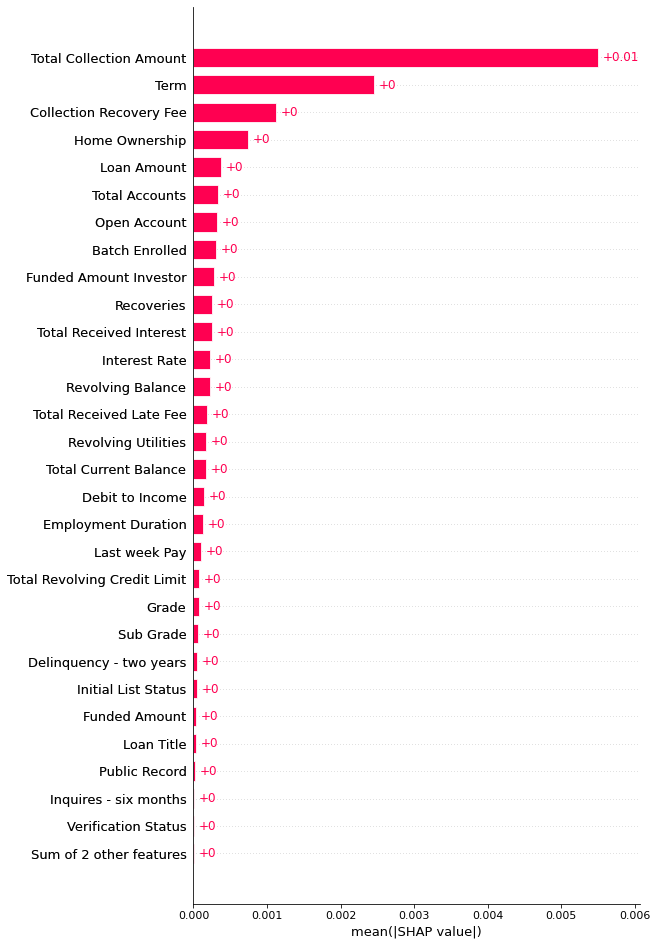

In [7]:
shap.plots.bar(loan_shap_values, max_display=30)

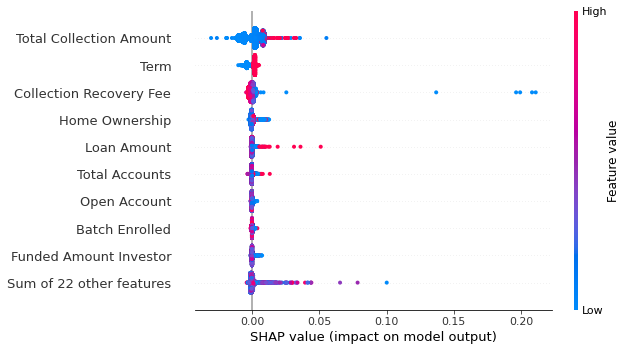

In [8]:
shap.plots.beeswarm(loan_shap_values)

In [9]:
loan_shap_values

.values =
array([[-3.25991748e-04, -5.56757229e-06, -1.05152281e-04, ...,
         1.50868602e-03,  6.61358446e-05, -2.03949751e-05],
       [-2.38794250e-04, -1.12582362e-06,  6.42803456e-05, ...,
        -9.85011844e-03,  9.19933764e-07,  2.13082309e-05],
       [-3.01348780e-04, -3.50440735e-06, -5.79820228e-05, ...,
        -5.74828483e-04, -1.66040857e-05, -3.27265865e-05],
       ...,
       [-2.80136433e-04, -8.14310891e-07, -1.44013584e-04, ...,
        -2.96975257e-04, -1.32625810e-04, -3.45458302e-05],
       [-2.92110959e-04, -1.46111208e-05, -1.63769711e-04, ...,
         1.56460934e-03, -4.09771010e-05,  4.23241047e-05],
       [ 5.18718473e-04, -7.56653757e-06, -5.28746449e-05, ...,
        -8.90101392e-03,  3.79155374e-04,  3.43237259e-04]])

.base_values =
array([0.09109852, 0.09109852, 0.09109852, ..., 0.09109852, 0.09109852,
       0.09109852])

.data =
array([[1.62000000e+04, 1.77740000e+04, 2.36721860e+04, ...,
        3.90000000e+01, 2.30976000e+05, 1.37300000e+04]

In [27]:
#df_loan_shap_values=pd.DataFrame(loan_shap_values.values)
df_export = pd.DataFrame()
df_export['loan_SHAP'] = pd.DataFrame(loan_shap_values.values).abs().mean()
df_export.to_csv('loan_SHAP.csv')
df_export

,loan_SHAP
0,3.680094e-04
1,3.853011e-05
2,2.780402e-04
3,2.449810e-03
4,3.038415e-04
5,2.278704e-04
6,7.473619e-05
7,6.420642e-05
8,1.355252e-04
9,7.459469e-04


# Same analysis for synthetically generated dataset usign CTGAN

In [10]:
#Import dataset
df_loan_ctgan = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\loan_CTGAN.csv', index_col=0)
df_loan_ctgan.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,9929,13021,14311.357218,58,6,11.582120,1,5,0,133891.263027,...,0.140596,0.000036,0.000036,0,0,44,13,38400,25094,0
1,20016,16724,34999.746430,59,29,9.267377,1,17,2,14573.537170,...,0.124059,9.365604,0.609480,0,0,112,84,617,17934,0
2,25304,7651,4937.529886,58,25,13.631651,1,22,0,71495.128048,...,0.093162,3.570540,1.365728,0,0,10,85,248566,11910,0
3,16751,11943,14820.125844,58,21,11.816073,1,1,0,38665.534020,...,0.000003,7.598273,0.955933,0,0,107,1,174920,13601,0
4,16142,16559,27051.658180,59,40,11.224051,1,32,0,30368.144882,...,42.618882,5.832536,0.726026,0,0,0,567,400902,2205,0


In [11]:
X = df_loan_ctgan.iloc[:,:-1]
y= np.array(df_loan_ctgan.loc[:,'Loan Status'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
#model = RandomForestRegressor()
model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=4)
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [13]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
ctgan_loan_shap_values = explainer(X_test)

Permutation explainer: 13494it [6:08:45,  1.64s/it]                                                                    


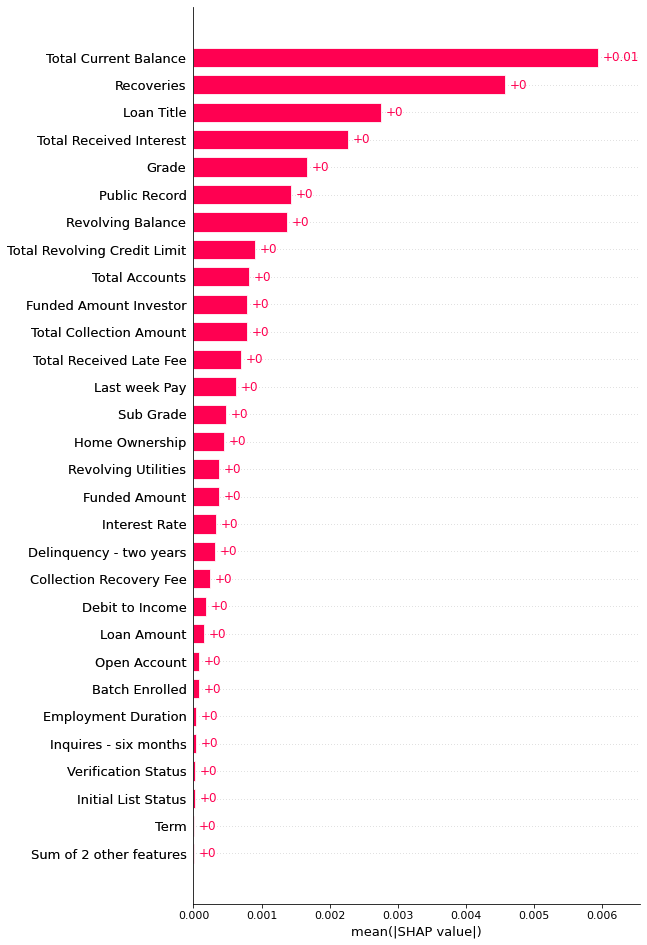

In [14]:
shap.plots.bar(ctgan_loan_shap_values, max_display = 30)

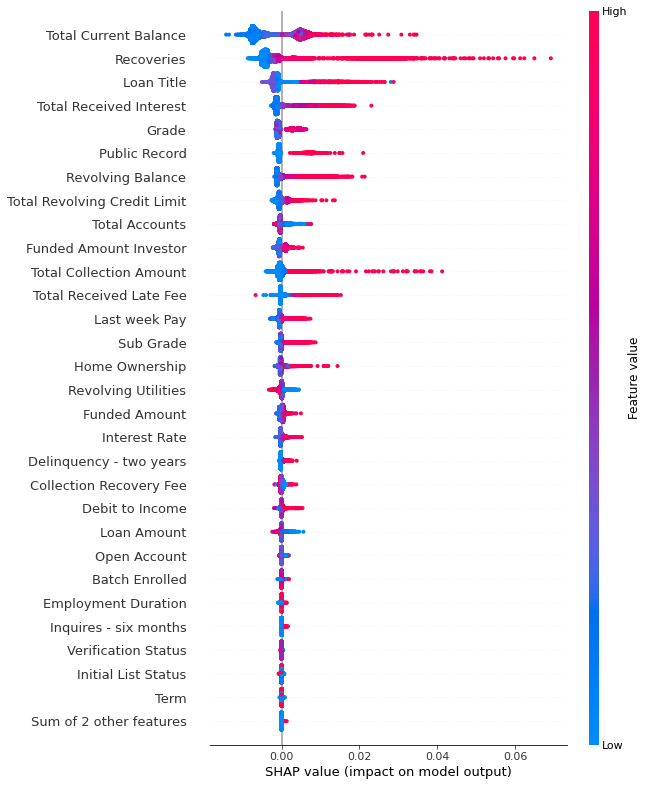

In [15]:
shap.plots.beeswarm(ctgan_loan_shap_values, max_display = 30)

In [28]:
df_export = pd.DataFrame()
df_export['CTGAN_loan_SHAP'] = pd.DataFrame(ctgan_loan_shap_values.values).abs().mean()
df_export.to_csv('CTGAN_loan_SHAP.csv')
df_export

,CTGAN_loan_SHAP
0,0.000149
1,0.000369
2,0.000786
3,0.000008
4,0.000076
5,0.000333
6,0.001660
7,0.000480
8,0.000032
9,0.000446


# Same analysis for synthetically generated dataset usign CTGAN

In [16]:
#Import dataset
df_loan_tvae = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\loan_TVAE.csv', index_col=0)
df_loan_tvae.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,18078,10665,12799.199333,59,13,10.129378,1,9,0,58663.277686,...,0.045604,6.783047,0.508133,0,0,87,49,38347,7477,0
1,8886,7686,11414.640441,59,11,11.205108,2,6,0,64252.330286,...,0.035038,3.319823,0.647176,0,0,72,38,64616,15009,0
2,6337,9641,7982.385370,59,9,11.095537,2,4,2,48986.950989,...,0.032240,2.240310,0.541151,0,0,82,28,88916,6536,0
3,7575,10910,10411.754149,58,17,9.786509,2,6,2,80948.718097,...,0.056759,3.370167,0.942945,0,0,80,27,17899,4923,0
4,18288,8079,12862.768926,59,12,10.112442,1,8,0,66577.265274,...,0.029507,4.103017,0.665545,0,0,88,2,80864,7136,0


In [17]:
X = df_loan_tvae.iloc[:,:-1]
y= np.array(df_loan_tvae.loc[:,'Loan Status'])

In [25]:
df_loan_tvae['Loan Status'].value_counts()

0    67463
Name: Loan Status, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
#model = RandomForestRegressor()
model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=4)
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [19]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
tvae_loan_shap_values = explainer(X_test)

Permutation explainer: 13494it [4:32:02,  1.21s/it]                                                                    


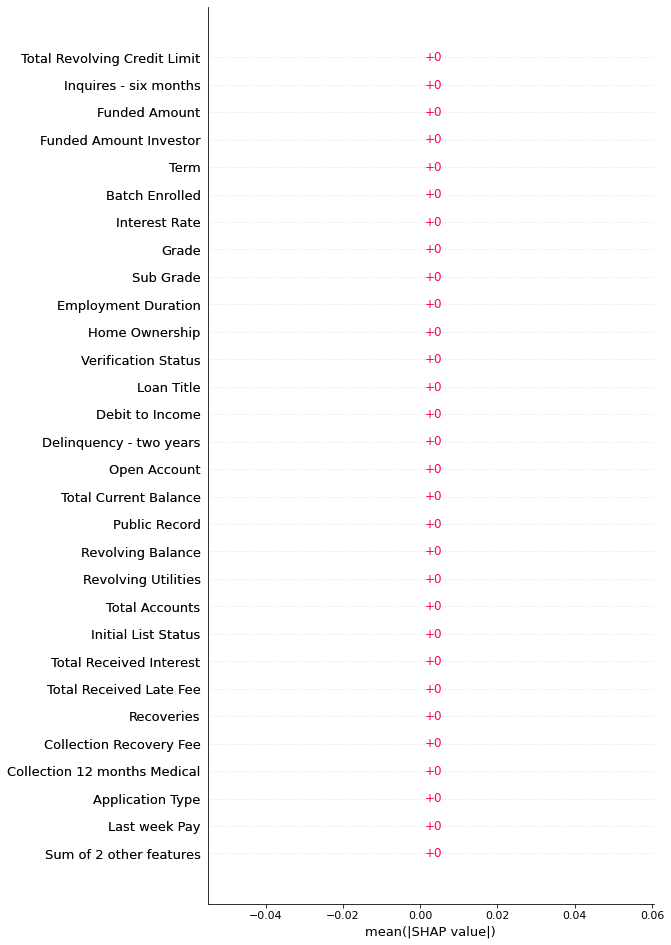

In [20]:
shap.plots.bar(tvae_loan_shap_values, max_display =30)

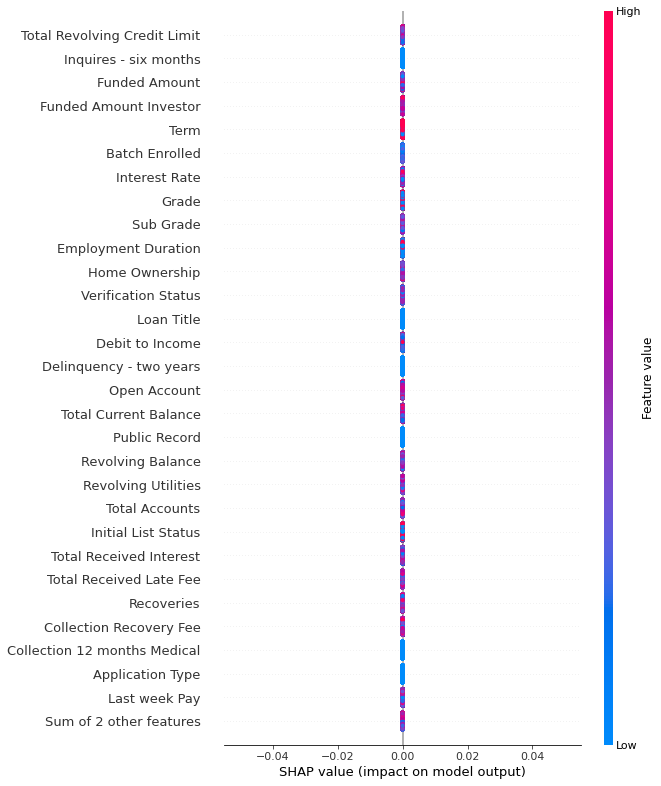

In [21]:
shap.plots.beeswarm(tvae_loan_shap_values, max_display = 30)